<a href="https://colab.research.google.com/github/wdon021/Comp261_A5/blob/master/Class_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

% Title
% ----
\title{Nueral Network: Projects 3D normal-dsitrbuted data onto a unit-radius Sphere}
%

### Introduction
Task: Create a (fully connected) neural network model that approximate the function for project input data x (normal-distributed) onto a unit-radius sphere space.

$y = f(x; \theta, w) = \phi(x; \theta)^T w$

Structure of report
1. create Dataset X and corresponding Y that projected on the unit sphere.
2. Define a cost function
3. Define a optimization procedure
4. Define a model
5. Train the Model
6. Define parameters
7. Model performance
8. Prediction

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
mean = [0, 0, 0]
cov = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

$\mu = [0, 0, 0]$

$\Sigma=
\begin{bmatrix} 
1 & 0 & 0 \\
0 & 1 & 0\\
0 & 0 & 1 \\
\end{bmatrix}
$

X is generated with mean =0 and variance =1 (standard deviation = 1), they are randomly cluster around co-cordinate of [0, 0, 0] in a 3-D space.
$X_i$ is linearly independent to each other with $i = \{1, 2, 3\}$. 

Y = X normalized by its euclidean distance.

$Y_{ij} = \frac{X_{ij}}{\sqrt{X_{1j}^2 + X_{2j}^2+X_{3j}^2}}$

Denominator is the radius of the sphere.

In [ ]:
def unit_sphere(data):
  return np.array([[coord / math.sqrt(sum(coords * coords for coords in line)) for coord in line] for line in data])

In [ ]:
united = np.random.multivariate_normal(mean, cov, 4000)

In [ ]:
x11, x22, x33 = united.T
united_y = unit_sphere(united)

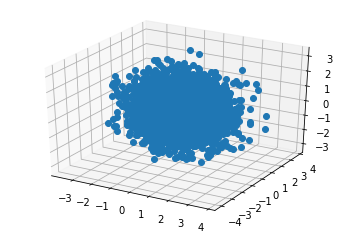

In [ ]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

### Training, validation, test split
- using the train_test_split() function provided in sklearn.
- Call the function twice to acquire Training set, Validation set and test set. 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(united, united_y, test_size = 0.25)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.25)

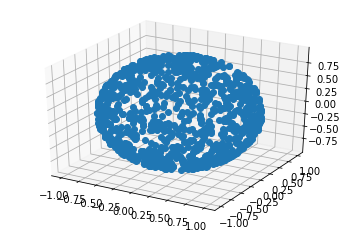

In [ ]:
x11, x22, x33 = Y_test.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(x11, x22, x33, 'o')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow import keras
import keras.backend as kb
import tensorflow as tf
from tensorflow.keras import layers
import datetime

In [ ]:
inputs = keras.Input(shape = (3,))
x1 = layers.Dense(10, activation="relu")(inputs)
x2 = layers.Dense(10, activation='relu')(x1)
outputs = layers.Dense(3, activation='linear')(x2)
model = keras.Model(inputs = inputs, outputs = outputs)

### Define Nueral Network architecture

This is a Three-layer feedforward neural network

$f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$

$f^{(1)}$ is the first hidden layer with 10 neurons and activation function = ReLU

$F^{(1)}(x) = W^Tx$

In our case $x=[x_1, x_2, x_3]$

$h_i = max\{0, x* \begin{bmatrix}{w_1 \\ w_2 \\ w_3} \end{bmatrix} + bias\}$

$h_i$ is the first neuron of the first hidden layer, $i= \{1,2,..,10\}$, in 1 row.
We have 10 neurons (unit) in the first hidden layer, so we have to multiply 10 sets of weights

$$
max\{0,
\begin{bmatrix}
w_{0,1} & w_{0,2} & w_{0,3} \\
w_{1,1} & w_{1,2} & w_{1,3} \\
w_{2,1} & w_{2,2} & w_{2,3} \\
\vdots & \vdots & \vdots \\
w_{9,1} & w_{9,2} & w_{9,3} \\
\end{bmatrix} *\begin{bmatrix}{x_0^{(0)} \\ x_1^{(0)} \\ x_2^{(0)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ \vdots \\ b_9} \end{bmatrix}\}
$$

Applying ReLU function to each specific component of the resulting vector inside.

Now we have a vector of activations for the first hidden layer $h^{(1)}$.


$f^{(2)}$ is the second hidden layer with 10 neurons, and ReLU activation functions.


$$
max\{0,
\begin{bmatrix}
w_{0,1} & \cdots & w_{0,9} \\
w_{1,1} & \cdots & w_{1,9} \\
w_{2,1} & \cdots & w_{2,9} \\
\vdots & \vdots & \vdots \\
w_{9,1} & \cdots & w_{9,9} \\
\end{bmatrix} *\begin{bmatrix}{h_0^{(1)} \\ h_1^{(1)} \\ \vdots \\ h_9^{(1)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ \vdots \\ b_9} \end{bmatrix}\}
$$

Applying ReLU function to each specific component of the resulting vector inside.

Now we have a vector of activations for the second hidden layer $h^{(2)}$.


$f^{(3)}$ is an output layer with 3 output units, and Linear activation

$$
c*\{
\begin{bmatrix}
w_{0,1} & \cdots & w_{0,9} \\
w_{1,1} & \cdots & w_{1,9} \\
w_{2,1} & \cdots & w_{2,9} \\
\end{bmatrix} *\begin{bmatrix}{h_0^{(2)} \\ h_1^{(2)} \\ \vdots \\ h_9^{(2)}} \end{bmatrix} + \begin{bmatrix}{b_0 \\ b_1 \\ b_2} \end{bmatrix}\}
$$

Applying Linear function to each specific component of the resulting vector inside.


In [ ]:
# training dataset
batch_size = 100

In [ ]:
X_train = tf.cast(X_train, tf.float32)
Y_train = tf.cast(Y_train, tf.float32)

In [ ]:
X_val = tf.cast(X_val, tf.float32)
Y_val = tf.cast(Y_val, tf.float32)

In [ ]:
X_test = tf.cast(X_test, tf.float32)

In [ ]:
# creates a dataset with a separate element fro each row of the input tensor
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).shuffle(buffer_size= 3000).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).shuffle(1000).batch(batch_size)

In [ ]:
optimizer = tf.keras.optimizers.Adam(1e-3)
epochs = 500

In [ ]:
# create an loss function # not effective
def Keras_loss_function(y_actual, y_predicted):
  mse = kb.mean(kb.sum(kb.square(y_actual - y_predicted))) # (1/n*(sum(sqr(Y-Y_hat))))
  return mse

# first 100 epochs is useful

### Design a cost function
For MiniBatch size = N
Y_actual and Y_predict is a 100 (rows) * 3(columns) matrix

2 Options

First Option - custom cost function

$$
\frac{\sum\limits_{j=1}^{N} \sum\limits_{i=1}^3 (Y_{actual(j,i)} - Y_{predict(j,i)})^2}{N}
$$

This is more traditional, one loss score for each mini-batch trained

Second Option - tf.keras.losses.MSE

$$
\frac{\sum\limits_{i=1}^3 (Y_{actual(j,i)} - Y_{predict(j,i)})^2}{3}
$$

output is a vector of loss score associates with each row in the minibatch.


### Model preparation
1. Generate 4,000 rows of X and corresponding Y
2. using the train_test_split() function provided in sklearn.
3. Call the function first time to have 20% of dataset as test set, then call the function second time on the remaining 80% to get the training set and validation set.
4. call tf.data.Dataset.from_tensor_slices() to create an input pipeline for both training and validation set, then chain with Dataset.batch() to make the Dataset object iterable.
5. Define optimization function = 'Adam' with learning rate 0.001


## Modelling
1. In 1 epoch
1. Sample a mini-batch = 100 rows from X_train and Y_train. 
2. Calculate the $\hat{Y}$ by complete one feedforward process with the Nueral Network architecture described above.

$\hat{Y} = a*\{W_3*max\{0, W_2*max\{0, W_1*x +b_1\}+b_2\} + b_3\}$
3. $W_1$ and $ W_2$  $W_3$ are the 3 weight matrix.
4. they all initialized with very small randome non-zero number.
5. $b_1, b_2, b_3$ are bias vectors, initialized with 0.
6. After calculated the $\hat{Y}$, apply the loss function to the $\hat{Y}$ and actual $Y$ to get the score of performance of the feedforward model. 
7. Then the model calculates the partial derivative for each weight in weight matrix and each bias in every bias vector.

### Update the weight

- With standard Stochastic gradient descent, each weight and bias is updated by
  - $w \leftarrow  w -$ learning rate * gradient of w with respect to the cost function.

- THe gradient with respect to each weight in the cost function is calculated in backpropagation using the chain rule.

1. $h_1 = W_1x +b_1$
2. $z_1 = \alpha (h_1)$. $\alpha $ is the ReLU activation function
3. $h_2 = W_2z_1 + b_2$
4. $z_2 = \alpha(h_2)$
5. $h_3 = W_3z_2 + b_3$
5. $z_3 = \alpha(h_3)$
6. $L = LL(z_3 -Y) $

- To calculate the partial derivative of one of weight $w_i$ in $W_3$ with respect to the $L$, in other word, how sensitive the $L$ function is to the small change of the $w_i$.

$$
\frac{\partial L}{\partial W_3} = \frac{\partial L}{\partial z_3} * \frac{\partial z_3}{\partial h_3}*\frac{\partial h_3}{\partial W_3}
$$

- If I trying to solve it
- $ \frac{\partial L}{\partial z_3} = 2(z_3 - Y)$, Z_3 and Y are both vector in this case.
- $ \frac{\partial z_3}{\partial h_3}$ this $\alpha$ the linear function is just a constant, so its basically the derivative of $h_3$
- $\frac{\partial h_3}{\partial W_3}$ is basically the derivative of $z_2$, which is $\alpha'(h_2)$




In [ ]:
training_mse = np.array([])
valid_mse = np.array([])

In [ ]:
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # compute the loss value for this minibatch
      mse = Keras_loss_function(y_batch_train, linear)
      # mse = tf.keras.losses.MSE(y_batch_train, linear)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    # print(model.trainable_weights)
    grads = tape.gradient(mse, model.trainable_weights)
    # print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(mse))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = Keras_loss_function(y_batch_val, val_linear)

  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_mse)))
  training_mse = np.append(training_mse, float(mse))
  valid_mse = np.append(valid_mse, float(val_mse))


Start of epoch 0
Training loss (for one batch) at step 0: 127.1304
seen so far: 100 samples
Training loss (for one batch) at step 10: 113.3082
seen so far: 1100 samples
Training loss (for one batch) at step 20: 112.1583
seen so far: 2100 samples
validation MSE: 50.2005

Start of epoch 1
Training loss (for one batch) at step 0: 100.8509
seen so far: 100 samples
Training loss (for one batch) at step 10: 93.6756
seen so far: 1100 samples
Training loss (for one batch) at step 20: 90.0708
seen so far: 2100 samples
validation MSE: 44.5308

Start of epoch 2
Training loss (for one batch) at step 0: 94.3834
seen so far: 100 samples
Training loss (for one batch) at step 10: 82.2447
seen so far: 1100 samples
Training loss (for one batch) at step 20: 83.4398
seen so far: 2100 samples
validation MSE: 38.8270

Start of epoch 3
Training loss (for one batch) at step 0: 74.0084
seen so far: 100 samples
Training loss (for one batch) at step 10: 69.9005
seen so far: 1100 samples
Training loss (for one b

In [ ]:
performance = pd.DataFrame()
performance['training_mse'] = training_mse
performance['valid_mse'] = valid_mse

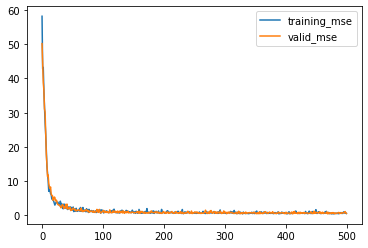

In [ ]:
performance.plot()

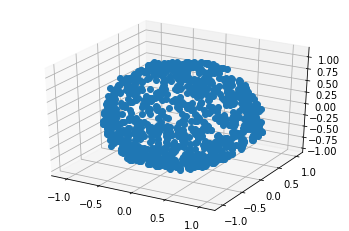

In [ ]:
prediction = model.predict(X_test)
f1, f2, f3 = prediction.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

In [ ]:
inputs = keras.Input(shape = (3,))
x1 = layers.Dense(10, activation="relu")(inputs)
x2 = layers.Dense(10, activation='relu')(x1)
outputs = layers.Dense(3, activation='linear')(x2)
model = keras.Model(inputs = inputs, outputs = outputs)
epochs = 500

In [ ]:
for epoch in range(epochs):
  print("\nStart of epoch %d" % (epoch,))

  # Iterate over the batches of the dataset.
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

    # open a GradientTape to record the operations run during the feed forward
    # enables aoto-partial-Differentiation
    with tf.GradientTape() as tape:
      # run the feed foward process of the layers.
      # the operations that the layers apply to its inpurts and going to bee recorded on the GradientTape
      linear = model(x_batch_train, training = True)
      # print(linear)
      # compute the loss value for this minibatch
      # mse = Keras_loss_function(y_batch_train, linear)
      mse = tf.keras.losses.MSE(y_batch_train, linear)
      reconstruction_error = tf.reduce_mean(mse)
      
      # print(mse)
      # mse = keras.losses.mean_squared_error(y_batch_train, linear) # mse gives 3 number
    # print(mse)
    # use the gradient tap to automatically retrieve the gradients of the 
    # trainable variables with respect to the loss
    grads = tape.gradient(mse, model.trainable_weights)
    # print(grads)
    # weight + bias for every layer
    # run one step of gradient dscent by updating the value of the variables to minize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    # print(model.trainable_weights,'\n')
    # print log information every 10 batches.
    if step % 10 == 0:
      print(
          "Training loss (for one batch) at step %d: %.4f"
          %(step, float(reconstruction_error))
      )
      print("seen so far: %s samples" % ((step +1) * 100))


  # Run a validation loop at the end of each epoch
  for x_batch_val, y_batch_val in val_dataset:
    val_linear = model(x_batch_val, training = False)
    val_mse = tf.keras.losses.MSE(y_batch_val, val_linear)
    val_reconstruction_error = tf.reduce_mean(val_mse)
  # print MSE for validation set
  print("validation MSE: %.4f" % (float(val_reconstruction_error)))



Start of epoch 0
Training loss (for one batch) at step 0: 0.4174
seen so far: 100 samples
Training loss (for one batch) at step 10: 0.2493
seen so far: 1100 samples
Training loss (for one batch) at step 20: 0.1747
seen so far: 2100 samples
validation MSE: 0.1148

Start of epoch 1
Training loss (for one batch) at step 0: 0.1511
seen so far: 100 samples
Training loss (for one batch) at step 10: 0.1101
seen so far: 1100 samples
Training loss (for one batch) at step 20: 0.0652
seen so far: 2100 samples
validation MSE: 0.0607

Start of epoch 2
Training loss (for one batch) at step 0: 0.0646
seen so far: 100 samples
Training loss (for one batch) at step 10: 0.0418
seen so far: 1100 samples
Training loss (for one batch) at step 20: 0.0365
seen so far: 2100 samples
validation MSE: 0.0339

Start of epoch 3
Training loss (for one batch) at step 0: 0.0348
seen so far: 100 samples
Training loss (for one batch) at step 10: 0.0372
seen so far: 1100 samples
Training loss (for one batch) at step 20: 

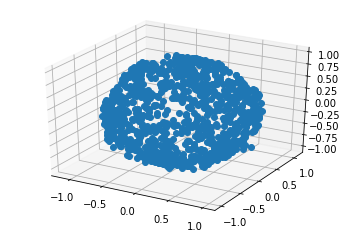

In [ ]:
prediction = model.predict(X_test)
f1, f2, f3 = prediction.T
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot3D(f1, f2, f3, 'o')

In [ ]:
# use Lecture's